# Loan Repayment Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('LoansTrainingSet.csv')
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


### EDA

In [3]:
df.shape

(256984, 19)

In [4]:
df.sample(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
169737,a8c54045-0ae8-448a-9bee-560e413efd42,9bd008c4-724c-46aa-8837-75dcebde1d9c,Fully Paid,18131,Short Term,NaN,10+ years,Rent,NaN,Debt Consolidation,$849.07,11.5,33.0,11,1,9679,25472,1.0,0.0
158736,9dddb3c0-4bdc-4c03-8848-683e17201e5a,9155e651-553e-4b3d-84fe-949dfbdad139,Fully Paid,16093,Long Term,699.0,7 years,Rent,45261.0,Debt Consolidation,"$1,297.48",16.2,NaN,8,0,21522,25744,0.0,0.0
242933,f1e28581-4b60-4e7c-9a47-a75adfa9f634,6358f082-8e92-49c7-bad0-76a94e14b2a8,Fully Paid,30360,Short Term,710.0,10+ years,Home Mortgage,91080.0,Home Improvements,"$2,261.82",24.6,14.0,9,0,3922,6680,0.0,0.0
241692,f0a7e33c-a8d2-45fc-b7fe-fedc9408c2b0,2a788618-955d-4f22-90dd-ad8514df3fa8,Fully Paid,24164,Long Term,668.0,8 years,Home Mortgage,63720.0,Debt Consolidation,$264.97,22.0,26.0,6,1,3100,4116,0.0,1.0
108609,6bea9c19-42eb-4f35-adf8-7f1bbb84089a,b21cb62b-4dfe-483a-b27b-4794b5eac9d0,Fully Paid,19952,Short Term,NaN,5 years,Home Mortgage,NaN,Debt Consolidation,"$1,626.51",15.6,58.0,11,0,9315,15761,0.0,0.0
139584,8ae141d4-5bad-42fa-8f95-291f2d06e5f1,99f42f82-05a2-4e5c-84ec-91e29600341b,Fully Paid,3157,Short Term,NaN,10+ years,Own Home,NaN,other,$96.57,15.5,NaN,3,1,2801,4931,1.0,0.0
211222,d220f642-35ad-4718-83fe-bd4b843fb7fe,2a2a633f-f0f1-4922-bf96-c589e51103f8,Fully Paid,7814,Short Term,748.0,10+ years,Rent,68376.0,Debt Consolidation,$626.78,20.1,NaN,9,0,7433,15716,0.0,0.0
59567,3b3e4731-6adb-4ec8-bf88-b8aa5180bebf,b7d76f16-004f-453e-9965-1347c954355c,Fully Paid,18234,Long Term,NaN,4 years,Rent,NaN,Debt Consolidation,$872.19,22.6,NaN,10,1,30428,62226,0.0,1.0
230339,e53dcafe-d9cd-4524-9c21-43a9ae1e65e9,d3ee5c39-387e-46b7-a230-d3a9e9628e10,Fully Paid,6950,Short Term,713.0,4 years,Rent,25815.0,Debt Consolidation,$219.43,12.3,NaN,5,0,6050,7245,0.0,0.0
59639,3b4ee35c-60d9-4e80-8162-af1254676fcd,cba18a45-100e-41a2-abe9-fee63395b7e5,Charged Off,22363,Long Term,653.0,10+ years,Rent,51116.0,Debt Consolidation,"$1,324.76",13.9,6.0,14,0,18540,31478,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [6]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


Credit score is supposed to range from 0 to 800. But max is 7510. ?????

In [7]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

I will clean missing data.
And I will drop LoanID and CustomerID, since they don't provide usefull info.

In [8]:
df[df['Credit Score'].isnull()]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
7,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,24613,Long Term,NaN,6 years,Rent,NaN,Business Loan,$542.29,17.6,73.0,7,0,14123,16954,0.0,0.0
8,00011dfc-31c1-4178-932a-fbeb3f341efb,ef6e098c-6c83-4752-8d00-ff793e476b8c,Fully Paid,10036,Short Term,NaN,5 years,Rent,NaN,Debt Consolidation,$386.36,17.7,NaN,7,0,11970,16579,0.0,0.0
12,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,17980,Short Term,NaN,< 1 year,Own Home,NaN,Debt Consolidation,$597.50,9.9,43.0,7,0,6817,22800,0.0,0.0
20,00038a08-f058-4add-a8ed-497b91672a9e,727bb429-dfa1-41c4-a347-23230e23949f,Charged Off,16929,Long Term,NaN,3 years,Home Mortgage,NaN,Debt Consolidation,$745.70,14.9,NaN,10,0,28513,101110,0.0,0.0
22,0003b749-307f-4830-9fb4-9db7ed1b1c48,998dc43c-f9ce-466e-bdaa-7057b0bbb9cd,Fully Paid,7228,Short Term,NaN,3 years,Home Mortgage,NaN,Debt Consolidation,$439.56,17.8,NaN,13,1,8488,15866,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256959,fff9b38f-9a27-49d0-8d49-6306f41529eb,f8579c88-cbda-48ce-a542-42fbefccd01d,Fully Paid,9753,Short Term,NaN,2 years,Own Home,NaN,Debt Consolidation,$469.35,23.2,80.0,7,1,5022,9248,1.0,0.0
256962,fffaa912-faa8-4bdf-8ff1-fd5884e51c66,d059bcea-3016-48d3-b7e0-c6e618e1f2c3,Fully Paid,6655,Short Term,NaN,10+ years,Rent,NaN,Debt Consolidation,$620.42,11.1,62.0,15,0,7114,18336,0.0,0.0
256965,fffc297d-74f0-4d42-ad90-cdea2bd9aac0,b8cae6f0-6c9b-4982-bef2-e3cdf48add59,Charged Off,11524,Short Term,NaN,6 years,Home Mortgage,NaN,Debt Consolidation,$790.35,21.4,NaN,23,0,12818,19160,0.0,0.0
256973,fffe36ec-97a6-460a-a236-640b7e0669f0,6520de3e-5961-47b1-bced-6a8132acb5cc,Charged Off,10575,Long Term,NaN,< 1 year,Rent,NaN,Debt Consolidation,$707.08,14.8,NaN,18,0,20183,23496,0.0,0.0


The rows that hav NaN value in the Credit Score column also have NaN values in Annual Income. Let's drop them.

In [9]:
df = df[df['Credit Score'].notnull()]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195308 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       195308 non-null  object 
 1   Customer ID                   195308 non-null  object 
 2   Loan Status                   195308 non-null  object 
 3   Current Loan Amount           195308 non-null  int64  
 4   Term                          195308 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          186512 non-null  object 
 7   Home Ownership                195308 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       195308 non-null  object 
 10  Monthly Debt                  195308 non-null  object 
 11  Years of Credit History       195308 non-null  float64
 12  Months since last delinquent  88466 non-null

In [11]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                         0
Years in current job              8796
Home Ownership                       0
Annual Income                        0
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    106842
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       413
Tax Liens                           15
dtype: int64

Credit Score and Annual Income have no longer any missing values.
Let's fix Credit Score's range.

In [12]:
df[['Credit Score']][(df['Credit Score'] > 800)]

,Credit Score
6,6640.0
55,7320.0
71,7180.0
73,6670.0
79,7270.0
...,...
256946,7450.0
256948,7220.0
256952,7410.0
256977,7170.0


Their last digit (0) was probably put there by mistake in a hurry. If I take 0 they are valid values. So I can divide them by 10.

In [13]:
df['Credit Score'] = df['Credit Score'].astype(np.int64)

In [14]:
df['Credit Score'] = df['Credit Score'].map(lambda x: x//10 if x > 800 else x)

In [15]:
df[['Credit Score']][(df['Credit Score'] > 800)].count()

Credit Score    0
dtype: int64

Converting object types to numeric types

In [16]:
df['Monthly Debt'] = df['Monthly Debt'].replace('[\$, ]', '', regex=True).astype(float)
df['Monthly Debt'].head()

0     584.03
1    1106.04
2    1321.85
3     751.92
4     355.18
Name: Monthly Debt, dtype: float64

In [17]:
df.iloc[140373,:]

Loan ID                         b798f46b-e27b-4823-af83-294b1ffc3490
Customer ID                     f61890c5-e264-4b0f-a047-9cfa03b9d182
Loan Status                                              Charged Off
Current Loan Amount                                             1470
Term                                                      Short Term
Credit Score                                                     725
Years in current job                                         2 years
Home Ownership                                                  Rent
Annual Income                                                  39200
Purpose                                           Debt Consolidation
Monthly Debt                                                  506.34
Years of Credit History                                         15.3
Months since last delinquent                                      26
Number of Open Accounts                                            3
Number of Credit Problems         

In [18]:
df = df[df['Maximum Open Credit'] != '#VALUE!']

In [19]:
df['Maximum Open Credit'] = pd.to_numeric(df['Maximum Open Credit'])
df['Maximum Open Credit'].head()

0    16056
1    19149
2    28335
3    43915
4    37081
Name: Maximum Open Credit, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195305 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       195305 non-null  object 
 1   Customer ID                   195305 non-null  object 
 2   Loan Status                   195305 non-null  object 
 3   Current Loan Amount           195305 non-null  int64  
 4   Term                          195305 non-null  object 
 5   Credit Score                  195305 non-null  int64  
 6   Years in current job          186509 non-null  object 
 7   Home Ownership                195305 non-null  object 
 8   Annual Income                 195305 non-null  float64
 9   Purpose                       195305 non-null  object 
 10  Monthly Debt                  195305 non-null  float64
 11  Years of Credit History       195305 non-null  float64
 12  Months since last delinquent  88465 non-null

#### Categorical Variables

In [21]:
df['Loan Status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [22]:
df['Term'].unique()

array(['Short Term', 'Long Term'], dtype=object)

In [23]:
df['Years in current job'].unique()

array(['10+ years', '4 years', '6 years', nan, '3 years', '2 years',
       '< 1 year', '5 years', '1 year', '7 years', '9 years', '8 years'],
      dtype=object)

In [24]:
df['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

In [25]:
df['Purpose'].unique()

array(['Debt Consolidation', 'other', 'Business Loan',
       'Home Improvements', 'Buy House', 'Other', 'Medical Bills',
       'Buy a Car', 'Take a Trip', 'Educational Expenses'], dtype=object)

There are categories that has the same meaning in Purpose and Home Ownership columns.

In [26]:
df['Home Ownership'] = df['Home Ownership'].map(lambda x: 'Home Mortgage' if x == 'HaveMortgage' else x)

In [27]:
df['Purpose'] = df['Purpose'].map(lambda x: 'Other' if x == 'other' else x)

In [28]:
df['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent'], dtype=object)

In [29]:
df['Purpose'].unique()

array(['Debt Consolidation', 'Other', 'Business Loan',
       'Home Improvements', 'Buy House', 'Medical Bills', 'Buy a Car',
       'Take a Trip', 'Educational Expenses'], dtype=object)

#### Missing Data

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195305 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       195305 non-null  object 
 1   Customer ID                   195305 non-null  object 
 2   Loan Status                   195305 non-null  object 
 3   Current Loan Amount           195305 non-null  int64  
 4   Term                          195305 non-null  object 
 5   Credit Score                  195305 non-null  int64  
 6   Years in current job          186509 non-null  object 
 7   Home Ownership                195305 non-null  object 
 8   Annual Income                 195305 non-null  float64
 9   Purpose                       195305 non-null  object 
 10  Monthly Debt                  195305 non-null  float64
 11  Years of Credit History       195305 non-null  float64
 12  Months since last delinquent  88465 non-null

In [31]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                         0
Years in current job              8796
Home Ownership                       0
Annual Income                        0
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    106840
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       413
Tax Liens                           15
dtype: int64

I will examine missing values in **Months since last delinquent**, Years in current job, Bankrupt, Tax Liens.

In [32]:
df2 = df[df['Months since last delinquent'].notnull()]
x = df2['Months since last delinquent']
y = df2['Loan Status'].map(lambda x: 1 if x == 'Fully Paid' else 0)

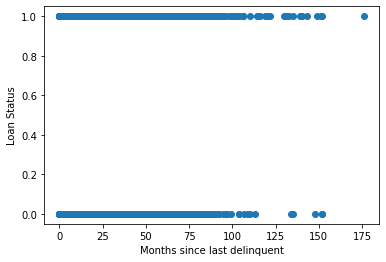

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y)
ax.set_ylabel('Loan Status')
ax.set_xlabel('Months since last delinquent');

According to the plot, there is not much difference between these two columns and there isn't noticable correlation. And since Months since last delinquent has so many missing values and wouldn't contribute much to our prediction model; I will drop that column.

In [34]:
df = df.drop(['Months since last delinquent'], axis=1)

In [35]:
df[df['Bankruptcies'].isnull()]['Loan Status'].value_counts()

Fully Paid     293
Charged Off    120
Name: Loan Status, dtype: int64

In [36]:
df2 = df[df['Bankruptcies'].notnull()]
x = df2['Bankruptcies']
y = df2['Loan Status'].map(lambda x: 1 if x == 'Fully Paid' else 0)

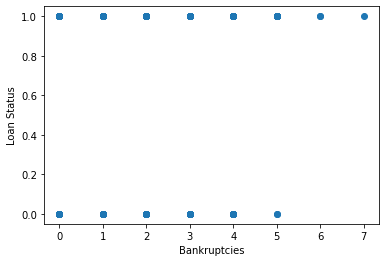

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y)
ax.set_ylabel('Loan Status')
ax.set_xlabel('Bankruptcies');

Bankruptcies, don't have noticable correlation. And there isn't too much data missing so i will drop it.

In [38]:
df = df[df['Bankruptcies'].notnull()]

In [39]:
df[df['Tax Liens'].isnull()]['Loan Status'].value_counts()

Series([], Name: Loan Status, dtype: int64)

In [40]:
df2 = df[df['Tax Liens'].notnull()]
x = df2['Tax Liens']
y = df2['Loan Status'].map(lambda x: 1 if x == 'Fully Paid' else 0)

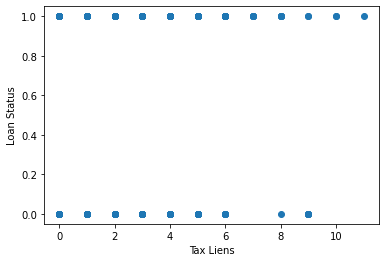

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)  
ax.scatter(x, y)
ax.set_ylabel('Loan Status')  
ax.set_xlabel('Tax Liens');

Tax Liens, don't have noticable correlation. And there isn't too much data missing so i will drop it.

In [42]:
df = df[df['Tax Liens'].notnull()] 

In [43]:
df[df['Years in current job'].isnull()]['Loan Status'].value_counts()

Fully Paid     5115
Charged Off    3681
Name: Loan Status, dtype: int64

In [44]:
df2 = df[df['Years in current job'].notnull()]
x = df2['Years in current job']
y = df2['Loan Status'].map(lambda x: 1 if x == 'Fully Paid' else 0)

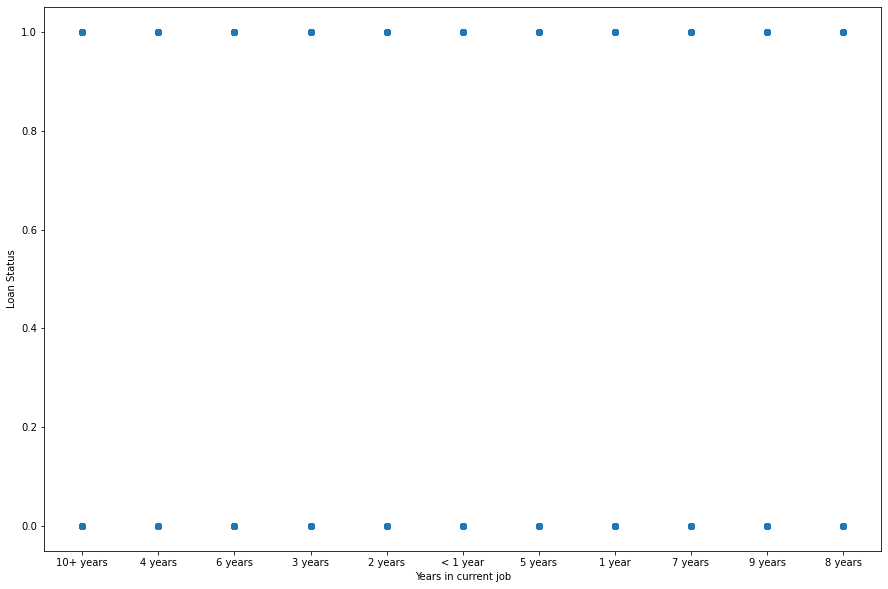

In [45]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)  
ax.scatter(x, y)
ax.set_ylabel('Loan Status')  
ax.set_xlabel('Years in current job');

Years in current job, don't have noticable correlation, so i will drop it.

In [46]:
df = df[df['Years in current job'].notnull()] 

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186096 entries, 0 to 256983
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan ID                    186096 non-null  object 
 1   Customer ID                186096 non-null  object 
 2   Loan Status                186096 non-null  object 
 3   Current Loan Amount        186096 non-null  int64  
 4   Term                       186096 non-null  object 
 5   Credit Score               186096 non-null  int64  
 6   Years in current job       186096 non-null  object 
 7   Home Ownership             186096 non-null  object 
 8   Annual Income              186096 non-null  float64
 9   Purpose                    186096 non-null  object 
 10  Monthly Debt               186096 non-null  float64
 11  Years of Credit History    186096 non-null  float64
 12  Number of Open Accounts    186096 non-null  int64  
 13  Number of Credit Problems  18

In [48]:
df.isnull().sum()

Loan ID                      0
Customer ID                  0
Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Years in current job         0
Home Ownership               0
Annual Income                0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

#### Duplicate Data

In [49]:
df['Loan ID'].nunique()

163512

In [50]:
df['Customer ID'].nunique()

163512

In [51]:
len(df)

186096

There is 186096 rows.<br>
Only 163512 of them are unique.<br>
So there are duplicate values.

In [52]:
df['Loan ID'].value_counts()

6e665b6e-87c2-4f2c-9449-ab0cbe45c83e    4
f32674e6-8252-44b2-9b3e-73f6d0ea3bd5    4
abe718dd-01ae-4bf8-ba80-566a50679e95    4
ee54cde9-de2d-442f-b098-e43c82c3910f    4
91037789-b0a2-4d49-89dc-78c27b5e5297    4
                                       ..
ef151278-f43a-42c0-a0a6-75ee7c92c574    1
457a288f-e520-419f-80dd-851743ed76b6    1
988dae86-3bce-46b0-bc95-589f79331646    1
3e2a1bdd-48eb-49c8-bdf0-c172ecc6084d    1
a613ddbe-30a5-4270-a9fd-90940e37fe4e    1
Name: Loan ID, Length: 163512, dtype: int64

In [53]:
df = df.drop_duplicates(['Loan ID'])

In [54]:
df['Loan ID'].nunique()

163512

In [55]:
df['Customer ID'].nunique()

163512

In [56]:
len(df)

163512

No duplicates left:)

#### Categorical -> Numeric

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163512 entries, 0 to 256983
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan ID                    163512 non-null  object 
 1   Customer ID                163512 non-null  object 
 2   Loan Status                163512 non-null  object 
 3   Current Loan Amount        163512 non-null  int64  
 4   Term                       163512 non-null  object 
 5   Credit Score               163512 non-null  int64  
 6   Years in current job       163512 non-null  object 
 7   Home Ownership             163512 non-null  object 
 8   Annual Income              163512 non-null  float64
 9   Purpose                    163512 non-null  object 
 10  Monthly Debt               163512 non-null  float64
 11  Years of Credit History    163512 non-null  float64
 12  Number of Open Accounts    163512 non-null  int64  
 13  Number of Credit Problems  16

Years in current job is an ordinal variable, which means that its categorical value can be treated as numeric since it affects the chance of loan grants due to career stability of the customer.

In [58]:
df['Years in current job'].unique()

array(['10+ years', '4 years', '6 years', '3 years', '2 years',
       '< 1 year', '5 years', '1 year', '7 years', '9 years', '8 years'],
      dtype=object)

In [59]:
df['Years in current job'] = df['Years in current job'].map(lambda x: '0' if x == '< 1 year' else x)
df['Years in current job'] = df['Years in current job'].replace( '[\+ years]','', regex=True).astype(np.int64)

In [60]:
df['Years in current job'].unique()

array([10,  4,  6,  3,  2,  0,  5,  1,  7,  9,  8], dtype=int64)

In [61]:
df[(df['Current Loan Amount'] > 100000)].head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
10,00020fb0-6b8a-4b3a-8c72-9c4c847e8cb6,c9decd06-16f7-44c3-b007-8776f2a9233d,Fully Paid,99999999,Short Term,742,3,Home Mortgage,64760.0,Debt Consolidation,582.84,26.8,11,0,8880,22711,0.0,0.0
16,0002c691-5314-44ab-b205-3fb1cc4ee6b2,41207d1e-5d13-43ec-9fe9-f222b4da5e0c,Fully Paid,99999999,Short Term,744,6,Home Mortgage,65605.0,Debt Consolidation,984.07,21.0,5,1,11514,17262,1.0,0.0
23,0003fbfd-33ee-4ae9-8074-b46f6ff59281,c14bbc84-5041-4e70-bd64-3db51f7e80ae,Fully Paid,99999999,Short Term,745,10,Rent,39476.0,Other,483.58,15.4,12,0,4636,21171,0.0,0.0
28,0004f37b-5859-40f6-98d0-367aa3b3f3f1,f662b062-5fa5-463d-b5c0-4e36d09fcab1,Fully Paid,99999999,Short Term,724,1,Own Home,34297.0,Home Improvements,777.38,13.6,12,0,6720,53335,0.0,0.0
42,0008cacc-1ea9-4599-b114-12709b13c85d,cd853967-4535-4d36-bf93-269504c74911,Fully Paid,99999999,Short Term,750,10,Own Home,86785.0,Other,56.41,22.0,7,0,3959,63862,0.0,0.0


Annual Income and Current Loan Amount doesn't make sense. So I will drop them.

In [62]:
df = df[df['Current Loan Amount'] < 99999999]

In [63]:
df[(df['Current Loan Amount'] > 100000)].head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens


#### Feature Engineering

In [64]:
df['Credit Utilization'] = df['Current Credit Balance'].div(df['Maximum Open Credit'] + 1, axis='index')

#### Categorical Data

In [65]:
df['Loan Status'] = df['Loan Status'].map(lambda x: 1 if x == 'Fully Paid' else 0)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129748 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan ID                    129748 non-null  object 
 1   Customer ID                129748 non-null  object 
 2   Loan Status                129748 non-null  int64  
 3   Current Loan Amount        129748 non-null  int64  
 4   Term                       129748 non-null  object 
 5   Credit Score               129748 non-null  int64  
 6   Years in current job       129748 non-null  int64  
 7   Home Ownership             129748 non-null  object 
 8   Annual Income              129748 non-null  float64
 9   Purpose                    129748 non-null  object 
 10  Monthly Debt               129748 non-null  float64
 11  Years of Credit History    129748 non-null  float64
 12  Number of Open Accounts    129748 non-null  int64  
 13  Number of Credit Problems  12

In [67]:
df.drop(['Loan ID', 'Customer ID'], axis=1, inplace=True)

In [68]:
df = pd.get_dummies(df, drop_first=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129748 entries, 0 to 256983
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   129748 non-null  int64  
 1   Current Loan Amount           129748 non-null  int64  
 2   Credit Score                  129748 non-null  int64  
 3   Years in current job          129748 non-null  int64  
 4   Annual Income                 129748 non-null  float64
 5   Monthly Debt                  129748 non-null  float64
 6   Years of Credit History       129748 non-null  float64
 7   Number of Open Accounts       129748 non-null  int64  
 8   Number of Credit Problems     129748 non-null  int64  
 9   Current Credit Balance        129748 non-null  int64  
 10  Maximum Open Credit           129748 non-null  int64  
 11  Bankruptcies                  129748 non-null  float64
 12  Tax Liens                     129748 non-nul

In [70]:
df.describe()

,Loan Status,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,...,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip
count,129748.000000,129748.000000,129748.000000,129748.000000,1.297480e+05,129748.000000,129748.000000,129748.000000,129748.000000,1.297480e+05,...,129748.000000,129748.000000,129748.000000,129748.000000,129748.000000,129748.000000,129748.000000,129748.000000,129748.000000,129748.000000
mean,0.730724,14020.185544,721.884445,5.868514,7.337514e+04,972.284594,18.064466,11.140272,0.151825,1.548060e+04,...,0.085874,0.424423,0.005842,0.013210,0.794309,0.000886,0.058313,0.010752,0.092456,0.006050
std,0.443585,8253.282479,27.398740,3.628715,5.696073e+04,634.760764,6.820855,4.971304,0.453858,1.920304e+04,...,0.280179,0.494257,0.076210,0.114174,0.404207,0.029758,0.234335,0.103131,0.289670,0.077548
min,0.000000,975.000000,585.000000,0.000000,4.033000e+03,0.000000,3.700000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7854.000000,711.000000,2.000000,4.525200e+04,541.057500,13.500000,8.000000,0.000000,6.024000e+03,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,12080.000000,731.000000,6.000000,6.286400e+04,853.170000,16.900000,10.000000,0.000000,1.117000e+04,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,19500.000000,741.000000,10.000000,8.827350e+04,1261.352500,21.500000,14.000000,0.000000,1.943225e+04,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,39304.000000,751.000000,10.000000,8.713547e+06,22939.120000,70.500000,76.000000,10.000000,1.730472e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Modelling

In [72]:
X = df.drop(columns=['Loan Status'], axis=1)
y = df['Loan Status']

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42)

### Regression

In [74]:
from sklearn.ensemble import RandomForestClassifier
r = RandomForestClassifier()
r.fit(X_train, y_train)
y_pred = r.predict(X_test)

In [75]:
from sklearn.metrics import confusion_matrix, classification_report

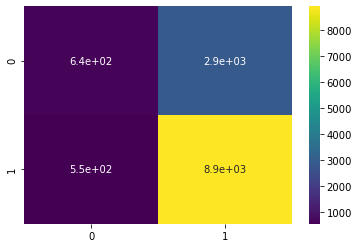

In [76]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='viridis', annot=True);

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.18      0.27      3514
           1       0.76      0.94      0.84      9461

    accuracy                           0.74     12975
   macro avg       0.65      0.56      0.56     12975
weighted avg       0.70      0.74      0.69     12975



### Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier
d = DecisionTreeClassifier()
d.fit(X_train, y_train)
y_pred = d.predict(X_test)

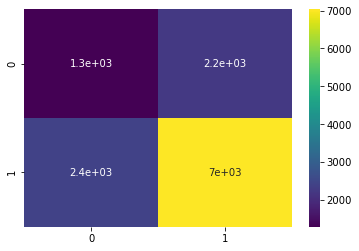

In [79]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='viridis', annot=True);

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.35      0.37      0.36      3514
           1       0.76      0.74      0.75      9461

    accuracy                           0.64     12975
   macro avg       0.55      0.55      0.55     12975
weighted avg       0.65      0.64      0.64     12975



### Distance

In [81]:
from sklearn.neighbors import KNeighborsClassifier
k = KNeighborsClassifier()
k.fit(X_train, y_train)
y_pred = k.predict(X_test)

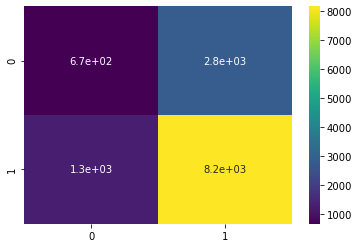

In [82]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='viridis', annot=True);

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.34      0.19      0.24      3514
           1       0.74      0.86      0.80      9461

    accuracy                           0.68     12975
   macro avg       0.54      0.53      0.52     12975
weighted avg       0.63      0.68      0.65     12975



### Probablity

In [84]:
from sklearn.linear_model import LogisticRegression
l = LogisticRegression()
regmodel = l.fit(X_train, y_train)
y_pretest = l.predict(X_test)

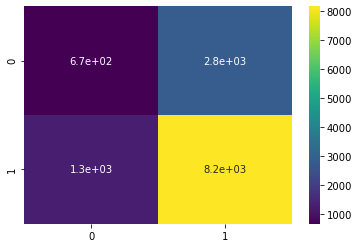

In [85]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='viridis', annot=True);

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.34      0.19      0.24      3514
           1       0.74      0.86      0.80      9461

    accuracy                           0.68     12975
   macro avg       0.54      0.53      0.52     12975
weighted avg       0.63      0.68      0.65     12975

